In [47]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from pathlib import Path
from keras import applications
from keras import layers
from keras import losses
from keras import ops
from keras import optimizers
from keras import metrics
from keras import Model
from keras.applications import resnet
from utilities import paths
from utilities import preprocessing
from utilities import visualization

In [30]:
anchor_images = sorted([paths.anchor_images_path + "\\" + f for f in os.listdir(paths.anchor_images_path)])
positive_images = sorted([paths.positive_images_path + "\\" + f for f in os.listdir(paths.positive_images_path)])
image_count = len(anchor_images)
if image_count != len(positive_images):
    raise Exception("Number of images in the datasets don't match")

In [33]:
anchor_dataset = tf.data.Dataset.from_tensor_slices(anchor_images)
positive_dataset = tf.data.Dataset.from_tensor_slices(positive_images)

In [22]:
rng = np.random.RandomState(seed=42)
rng.shuffle(anchor_images)
rng.shuffle(positive_images)

In [23]:
negative_images = anchor_images + positive_images
np.random.RandomState(seed=32).shuffle(negative_images)

In [35]:
negative_dataset = tf.data.Dataset.from_tensor_slices(negative_images)
negative_dataset = negative_dataset.shuffle(buffer_size=4096)

In [53]:
dataset = tf.data.Dataset.zip((anchor_dataset, positive_dataset, negative_dataset))
dataset = dataset.shuffle(buffer_size=1024)
dataset = dataset.map(preprocessing.preprocess_triplets)

In [54]:
train_dataset = dataset.take(round(image_count * 0.8)) # images for training
val_dataset = dataset.skip(round(image_count * 0.8)) # images for validation

In [55]:
train_dataset = train_dataset.batch(32, drop_remainder=False)
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

val_dataset = val_dataset.batch(32, drop_remainder=False)
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

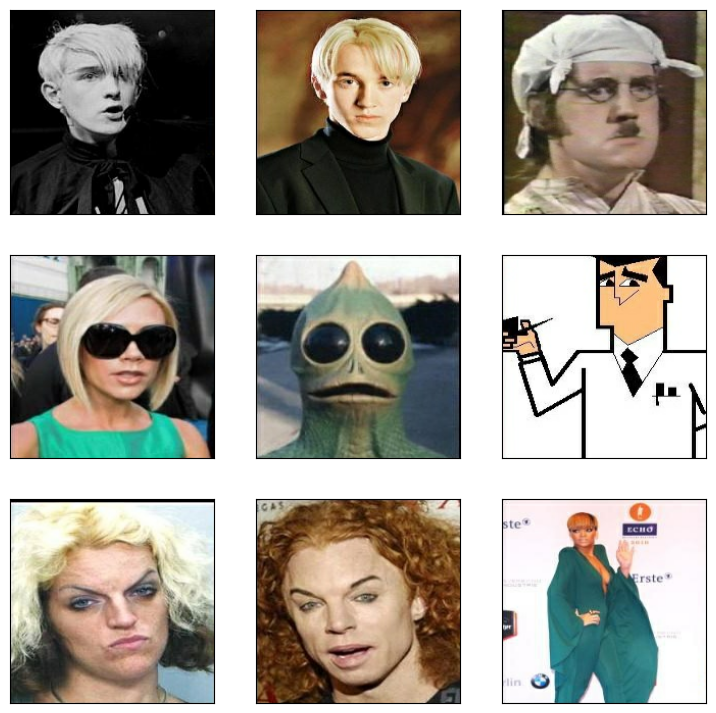

In [56]:
visualization.visualize(*list(train_dataset.take(1).as_numpy_iterator())[0]) #https://www.geeksforgeeks.org/python-star-or-asterisk-operator/ 